# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key


# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

api = "63fab35f58c32361c8c8caeb84516251"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))
#There should be a country for every city

593
593


In [6]:
#Create DF

weather_df = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,bengkulu,,id,,,,,,
1,ushuaia,,ar,,,,,,
2,rikitea,,pf,,,,,,
3,faya,,td,,,,,,
4,axim,,gh,,,,,,
...,...,...,...,...,...,...,...,...,...
588,aksarka,,ru,,,,,,
589,batticaloa,,lk,,,,,,
590,haines junction,,ca,,,,,,
591,gamba,,ga,,,,,,


In [7]:
target_city = "hermanus"
target_url = 'http://api.openweathermap.org/data/2.5/weather?appid=63fab35f58c32361c8c8caeb84516251&units=imperial&q=hermanus'
response = requests.get(target_url).json()
response

{'coord': {'lon': 19.23, 'lat': -34.42},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 48,
  'feels_like': 41.18,
  'temp_min': 48,
  'temp_max': 48,
  'pressure': 1023,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 320},
 'clouds': {'all': 91},
 'dt': 1597901413,
 'sys': {'type': 3,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1597900609,
  'sunset': 1597940180},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
counter_num = 1
counter_set = 1

base_url = 'http://api.openweathermap.org/data/2.5/weather?appid=63fab35f58c32361c8c8caeb84516251&units=imperial&q='

city_name =   []
max_temp = []
humidity = []
clouds = []
wind_speed = []
date = []
country_name = []
lats = []
long = []




In [9]:
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, row in weather_df.iterrows():
        query_url = base_url + row['City'] + ',' + row['Country']
    
        response = requests.get(query_url).json()
        
        try:
            print(f'Processing Weather Data for Record {counter_num} of Set {counter_set} | {response["name"]}')
       
            weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            weather_df.loc[index, 'Date'] = response['dt']
            weather_df.loc[index, 'Humidity'] = response['main']['humidity']
            weather_df.loc[index, 'Lat'] = response['coord']['lat']
            weather_df.loc[index, 'Lng'] = response['coord']['lon']
            weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
            weather_df.loc[index, 'Windspeed'] = response['wind']['speed']
       
            counter_num += 1
    
       
        except (KeyError, IndexError):
            print("City not found....Skipping............")
    
  


Beginning Data Retrieval
-------------------------------
Processing Weather Data for Record 1 of Set 1 | Bengkulu
Processing Weather Data for Record 2 of Set 1 | Ushuaia
Processing Weather Data for Record 3 of Set 1 | Rikitea
City not found....Skipping............
Processing Weather Data for Record 4 of Set 1 | Esim
Processing Weather Data for Record 5 of Set 1 | Nikolskoye
City not found....Skipping............
Processing Weather Data for Record 6 of Set 1 | Meridian
Processing Weather Data for Record 7 of Set 1 | East London
Processing Weather Data for Record 8 of Set 1 | Kiambu
City not found....Skipping............
Processing Weather Data for Record 9 of Set 1 | Mount Gambier
Processing Weather Data for Record 10 of Set 1 | Saint-Philippe
Processing Weather Data for Record 11 of Set 1 | Tasiilaq
City not found....Skipping............
Processing Weather Data for Record 12 of Set 1 | Yellowknife
Processing Weather Data for Record 13 of Set 1 | Busselton
Processing Weather Data for Re

Processing Weather Data for Record 128 of Set 1 | Kayes
Processing Weather Data for Record 129 of Set 1 | Sheksna
Processing Weather Data for Record 130 of Set 1 | Sheopur
Processing Weather Data for Record 131 of Set 1 | Drumheller
Processing Weather Data for Record 132 of Set 1 | Yebaishou
Processing Weather Data for Record 133 of Set 1 | Saint George
Processing Weather Data for Record 134 of Set 1 | Troitskoye
Processing Weather Data for Record 135 of Set 1 | Beringovskiy
Processing Weather Data for Record 136 of Set 1 | Arlit
Processing Weather Data for Record 137 of Set 1 | Burnie
Processing Weather Data for Record 138 of Set 1 | Jumla
Processing Weather Data for Record 139 of Set 1 | Stephenville
Processing Weather Data for Record 140 of Set 1 | Zavetnoye
Processing Weather Data for Record 141 of Set 1 | Unterhaching
Processing Weather Data for Record 142 of Set 1 | Guerrero Negro
Processing Weather Data for Record 143 of Set 1 | Belaya Gora
Processing Weather Data for Record 144

Processing Weather Data for Record 258 of Set 1 | São Félix do Xingu
Processing Weather Data for Record 259 of Set 1 | Kang
Processing Weather Data for Record 260 of Set 1 | Villamor
Processing Weather Data for Record 261 of Set 1 | Cam Ranh
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 262 of Set 1 | Arrondissement de Saint-Gaudens
Processing Weather Data for Record 263 of Set 1 | La Ronge
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 264 of Set 1 | Maua
Processing Weather Data for Record 265 of Set 1 | Avanigadda
Processing Weather Data for Record 266 of Set 1 | Alugan
Processing Weather Data for Record 267 of Set 1 | Coihueco
Processing Weather Data for Record 268 of Set 1 | Buala
Processing Weather Data for Record 269 of Set 1 | Virginia Beach
Processing Weather Data for Record 270 of Set 1 | Sept-Îles
Processing Weather Data for Record 271 of Set 1 

Processing Weather Data for Record 383 of Set 1 | Rudnogorsk
Processing Weather Data for Record 384 of Set 1 | Aksu
Processing Weather Data for Record 385 of Set 1 | Shenjiamen
Processing Weather Data for Record 386 of Set 1 | Gobō
Processing Weather Data for Record 387 of Set 1 | Gornyy
Processing Weather Data for Record 388 of Set 1 | Onega
Processing Weather Data for Record 389 of Set 1 | Tandlianwala
Processing Weather Data for Record 390 of Set 1 | Mil'kovo
Processing Weather Data for Record 391 of Set 1 | Dicabisagan
Processing Weather Data for Record 392 of Set 1 | Isangel
Processing Weather Data for Record 393 of Set 1 | Salinas
City not found....Skipping............
Processing Weather Data for Record 394 of Set 1 | Khovd
Processing Weather Data for Record 395 of Set 1 | Carndonagh
Processing Weather Data for Record 396 of Set 1 | Upata
City not found....Skipping............
Processing Weather Data for Record 397 of Set 1 | Kloulklubed
Processing Weather Data for Record 398 of 

Processing Weather Data for Record 516 of Set 1 | Belluno
Processing Weather Data for Record 517 of Set 1 | Port Pirie
Processing Weather Data for Record 518 of Set 1 | Cap Malheureux
Processing Weather Data for Record 519 of Set 1 | Kpandu
Processing Weather Data for Record 520 of Set 1 | Sikonge
Processing Weather Data for Record 521 of Set 1 | Mentakab
Processing Weather Data for Record 522 of Set 1 | Verkhnevilyuysk
Processing Weather Data for Record 523 of Set 1 | Luba
Processing Weather Data for Record 524 of Set 1 | Moyale
Processing Weather Data for Record 525 of Set 1 | North Bend
Processing Weather Data for Record 526 of Set 1 | La Paz
Processing Weather Data for Record 527 of Set 1 | Sibi
Processing Weather Data for Record 528 of Set 1 | Bilibino
Processing Weather Data for Record 529 of Set 1 | Aksarka
Processing Weather Data for Record 530 of Set 1 | Batticaloa
Processing Weather Data for Record 531 of Set 1 | Haines Junction
Processing Weather Data for Record 532 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_df = weather_df.dropna()

weather_df.to_csv("Outputweather_df.csv", encoding='utf-8', index=False)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,bengkulu,99,id,1597901459,62,-3.8,102.27,86.45,9.51
1,ushuaia,75,ar,1597901197,93,-54.8,-68.3,39.20,23.04
2,rikitea,97,pf,1597901415,82,-23.12,-134.97,70.27,20.27
4,axim,70,gh,1597901460,88,4.87,-2.24,75.02,9.4
5,nikolskoye,0,ru,1597901461,82,59.7,30.79,57.99,4.47


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:


cities = pd.read_csv("Outputweather_df.csv", encoding="utf-8")
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,bengkulu,99,id,1597901459,62,-3.80,102.27,86.45,9.51
1,ushuaia,75,ar,1597901197,93,-54.80,-68.30,39.20,23.04
2,rikitea,97,pf,1597901415,82,-23.12,-134.97,70.27,20.27
3,axim,70,gh,1597901460,88,4.87,-2.24,75.02,9.40
4,nikolskoye,0,ru,1597901461,82,59.70,30.79,57.99,4.47


## Latitude vs. Temperature Plot

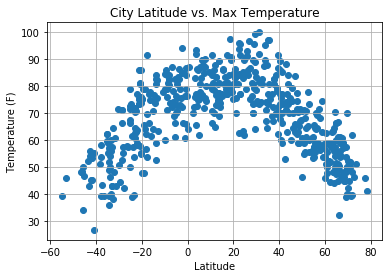

In [11]:
weather_df['Max Temp'] = weather_df['Max Temp'].replace('', np.nan)
weather_df = weather_df.dropna()
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")

plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

        
plt.show()

## Latitude vs. Humidity Plot

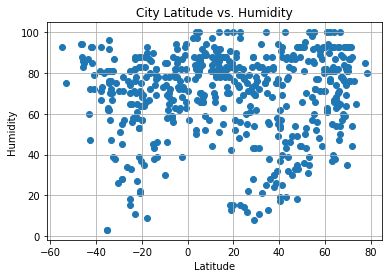

In [12]:

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title(f'City Latitude vs. Humidity')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

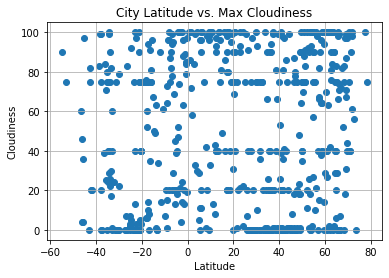

In [24]:

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")


plt.title(f'City Latitude vs. Max Cloudiness')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

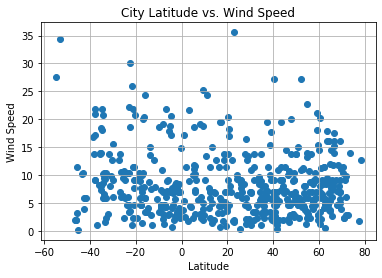

In [25]:

plt.scatter(weather_df["Lat"], weather_df["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()